In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [17]:
train_df = pd.read_csv ('train.csv')
test_df = pd.read_csv ('test.csv')

In [18]:
train_df.shape

(891, 12)

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test_df.shape

(418, 11)

In [21]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

test data has no "Survived" column

In [24]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
train_df = train_df.drop(columns=["Cabin"])
test_df = test_df.drop(columns=["Cabin"])

In [27]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

C:\Users\lloyduntalan\AppData\Local\Temp\ipykernel_9408\2874709374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
C:\Users\lloyduntalan\AppData\Local\Temp\ipykernel_9408\2874709374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

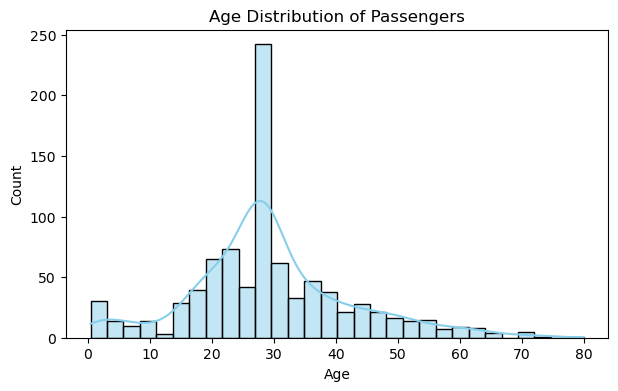

In [48]:
plt.figure(figsize=(7,4))
sns.histplot(train_df["Age"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
train_df[""] = train_df["Survived"].map({0: "Died", 1: "Survived"})Survival_Label

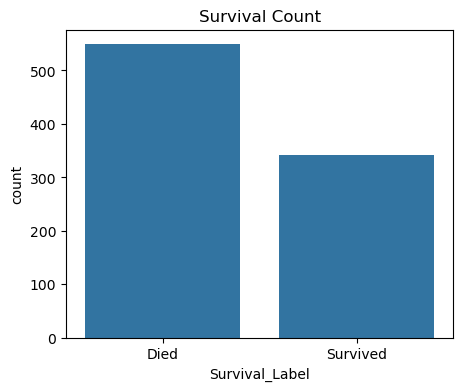

In [56]:
plt.figure(figsize=(5,4))
sns.countplot(x="Survival_Label", data=train_df)
plt.title("Survival Count")
plt.show()

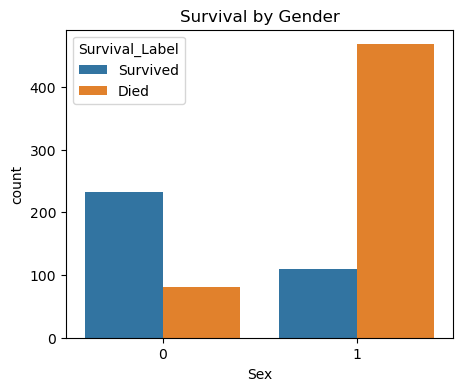

In [57]:
plt.figure(figsize=(5,4))
sns.countplot(x="Sex", hue="Survival_Label", data=train_df)
plt.title("Survival by Gender")
plt.show()

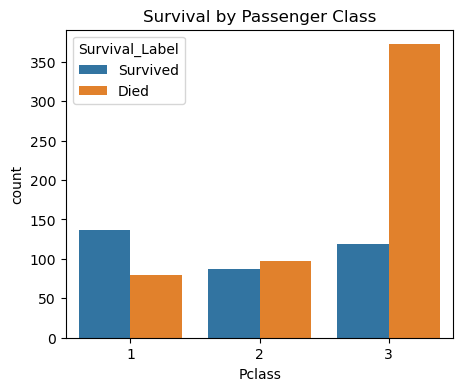

In [58]:
plt.figure(figsize=(5,4))
sns.countplot(x="Pclass", hue="Survival_Label", data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

In [28]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)

C:\Users\lloyduntalan\AppData\Local\Temp\ipykernel_9408\3434882312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
C:\Users\lloyduntalan\AppData\Local\Temp\ipykernel_9408\3434882312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [29]:
le = LabelEncoder()

In [30]:
train_df["Sex"] = le.fit_transform(train_df["Sex"])
test_df["Sex"] = le.transform(test_df["Sex"])

In [31]:
train_df["Embarked"] = le.fit_transform(train_df["Embarked"])
test_df["Embarked"] = le.transform(test_df["Embarked"])

In [34]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_train = train_df[features]
y_train = train_df["Survived"]

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))

Training Accuracy: 0.9797979797979798


In [42]:
predictions = model.predict(test_df[features])
output = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": predictions})
output.to_csv("submission.csv", index=False)